In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\vijal\.conda\envs\dfpy\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\vijal\.conda\envs\dfpy\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\vijal\.conda\envs\dfpy\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('track_features_final.csv', index_col=0)

In [3]:
df.head()

,track_id,title,artist,genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,Food,AWOL,Hip-Hop,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,5,This World,AWOL,Hip-Hop,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
2,10,Freeway,Kurt Vile,Pop,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
3,140,Queen Of The Wires,Alec K. Redfearn & the Eyesores,Folk,0.376312,0.734079,0.265685,0.669581,0.085995,0.039068,107.952,0.609991
4,141,Ohio,Alec K. Redfearn & the Eyesores,Folk,0.963657,0.435933,0.075632,0.345493,0.105686,0.026658,33.477,0.163950


In [21]:
# Create a barlot to see the distribution of the spotify features for each genre of music

In [4]:
tidy_df = df[['acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'valence',
       'genre']].melt(id_vars='genre')

<AxesSubplot:xlabel='genre', ylabel='value'>

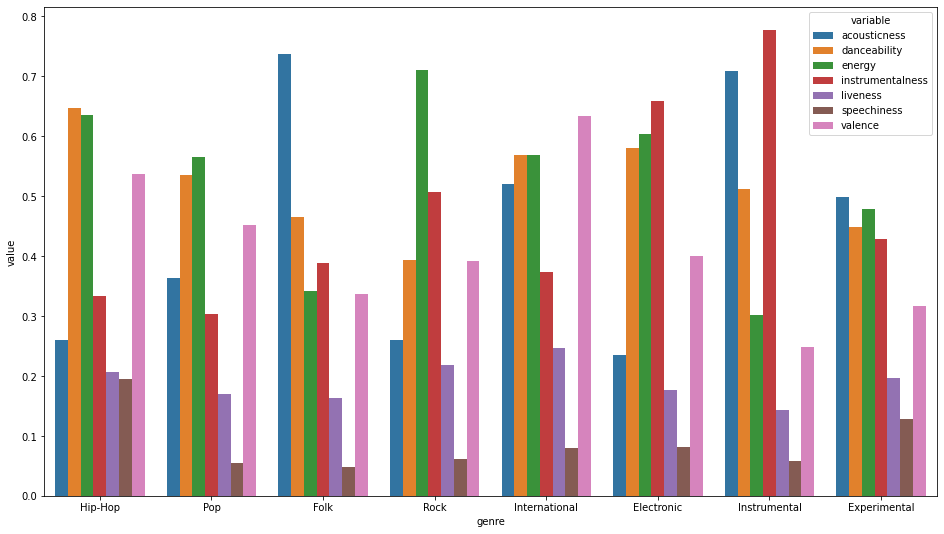

In [20]:
plt.figure(figsize=(16, 9))
sns.barplot(data=tidy_df, x='genre', y='value', hue='variable', ci=None)

<AxesSubplot:>

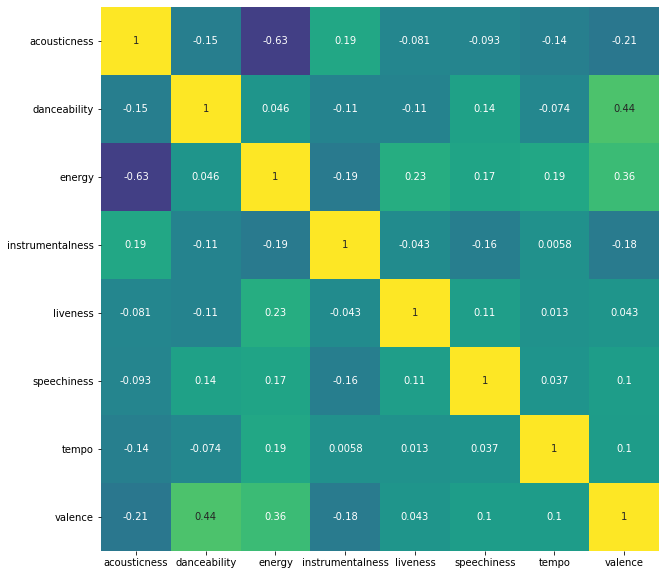

In [25]:
# heatmap of the spotify features
plt.figure(figsize=(10,10))
sns.heatmap(data=df.iloc[:, 1:].corr(), cmap='viridis',vmin=-1, annot=True, cbar=False)

In [8]:
df.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000
mean,73893.908343,0.455092,0.514058,0.521585,0.475344,0.186532,0.081659,120.516013,0.407626
std,47180.106094,0.382882,0.190960,0.273554,0.404313,0.159830,0.100461,32.101846,0.274828
min,2.000000,0.000000,0.000000,0.000096,0.000000,0.017900,0.000000,0.000000,0.000000
25%,30422.000000,0.042541,0.378447,0.298443,0.004995,0.099479,0.034629,96.199000,0.171543
50%,75893.000000,0.412500,0.526625,0.524095,0.575023,0.118331,0.044795,119.946500,0.360805
75%,118236.250000,0.860250,0.657000,0.748286,0.888000,0.210000,0.075600,140.009750,0.624000
max,154413.000000,0.996000,0.961871,1.000000,0.997000,0.981000,0.959222,250.059000,0.991132


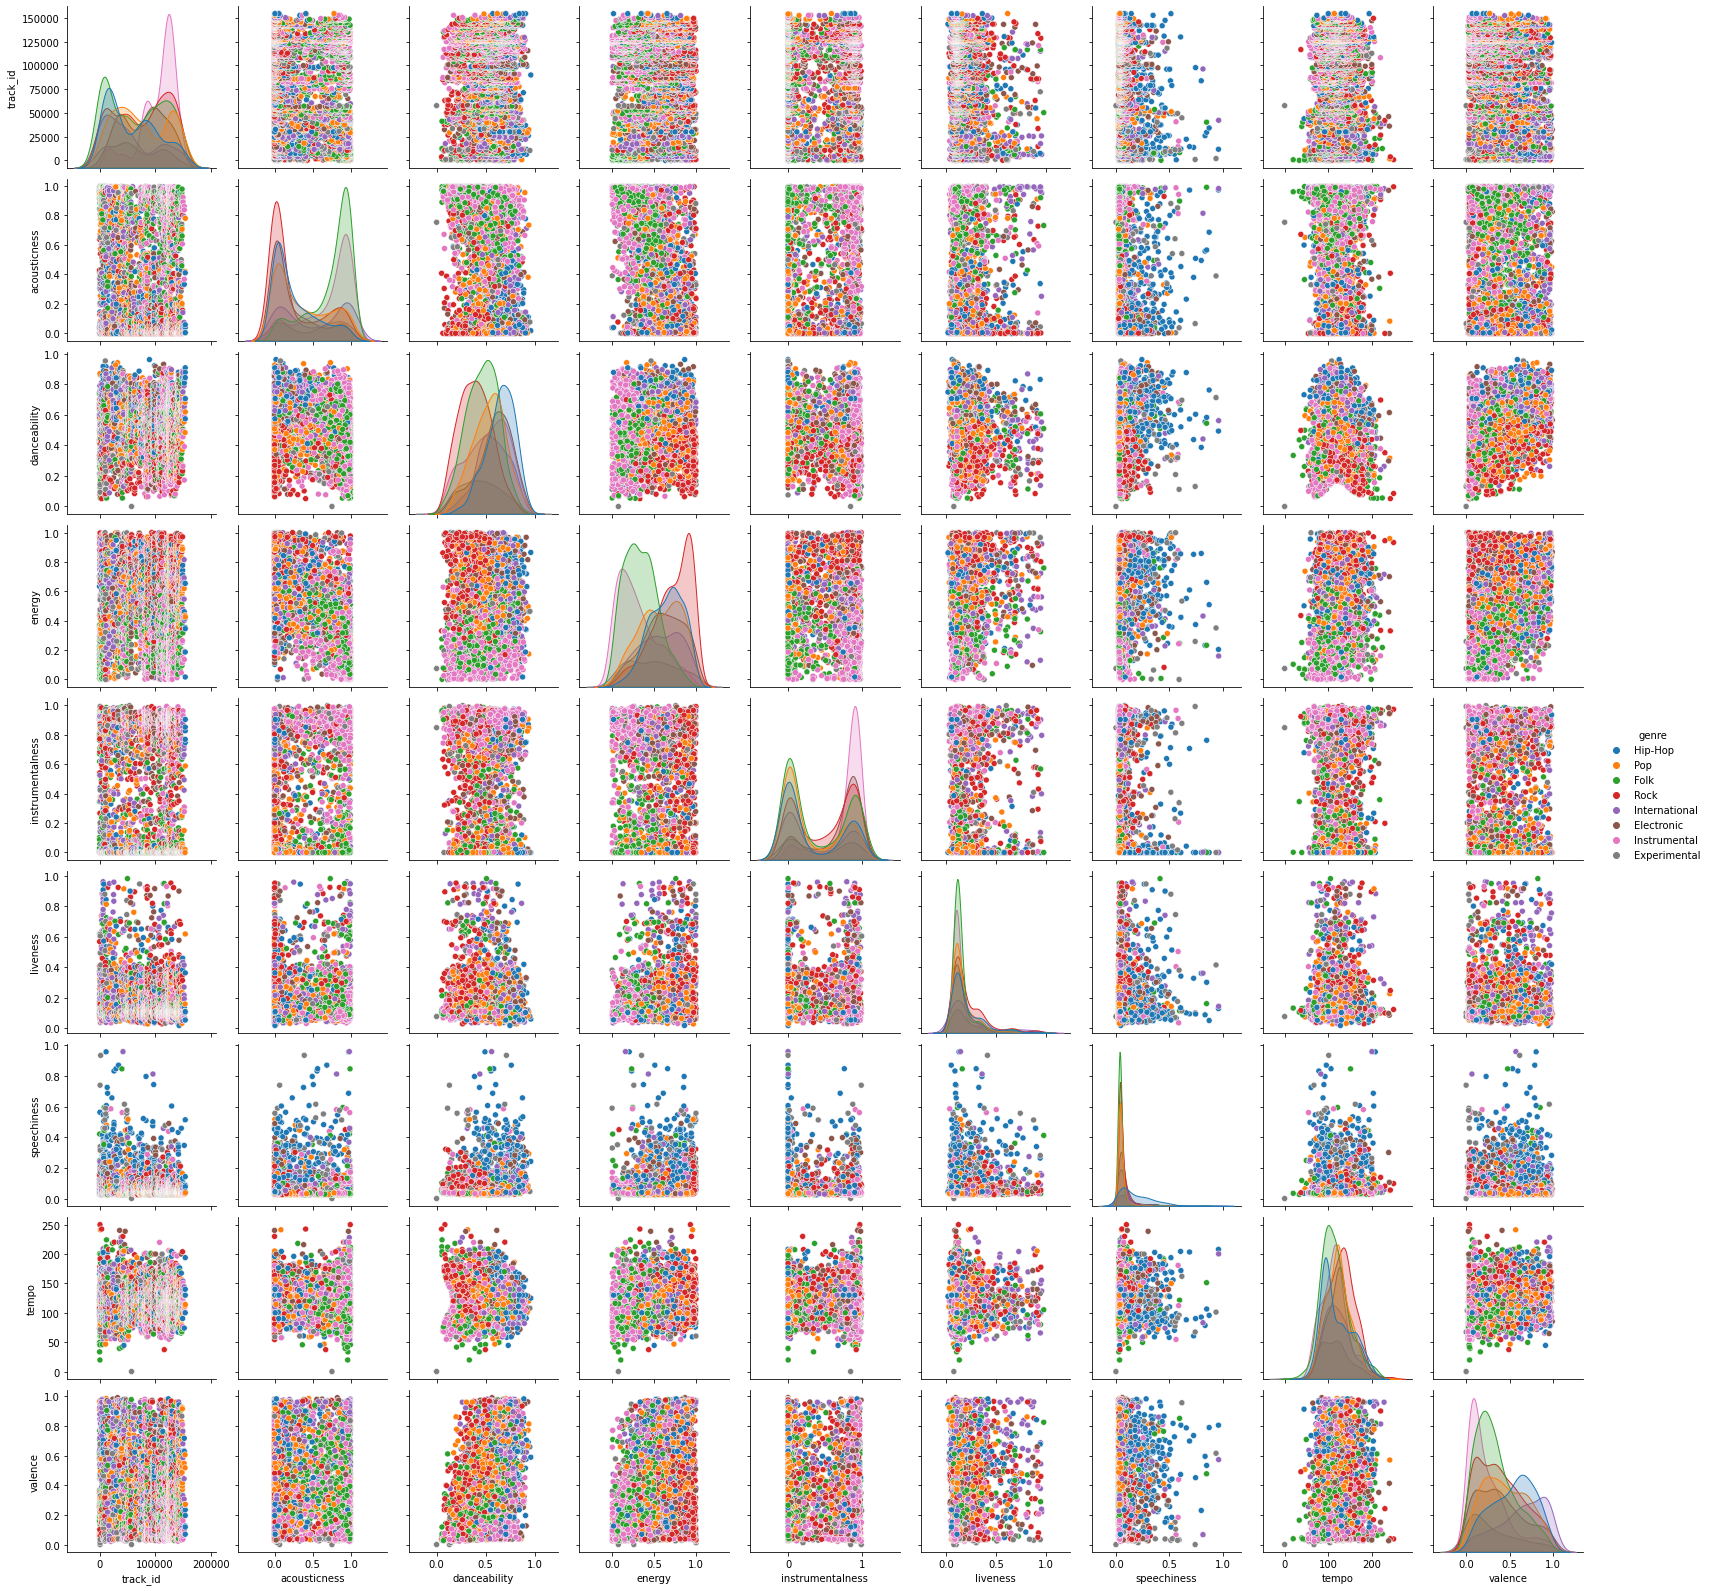

In [11]:
sns.pairplot(df, hue='genre')

In [26]:
# produce a boxplot to see the distribution of each spotify feature for all genres
# some features like liveliness speechiness are hard to distiguish based on genre alone

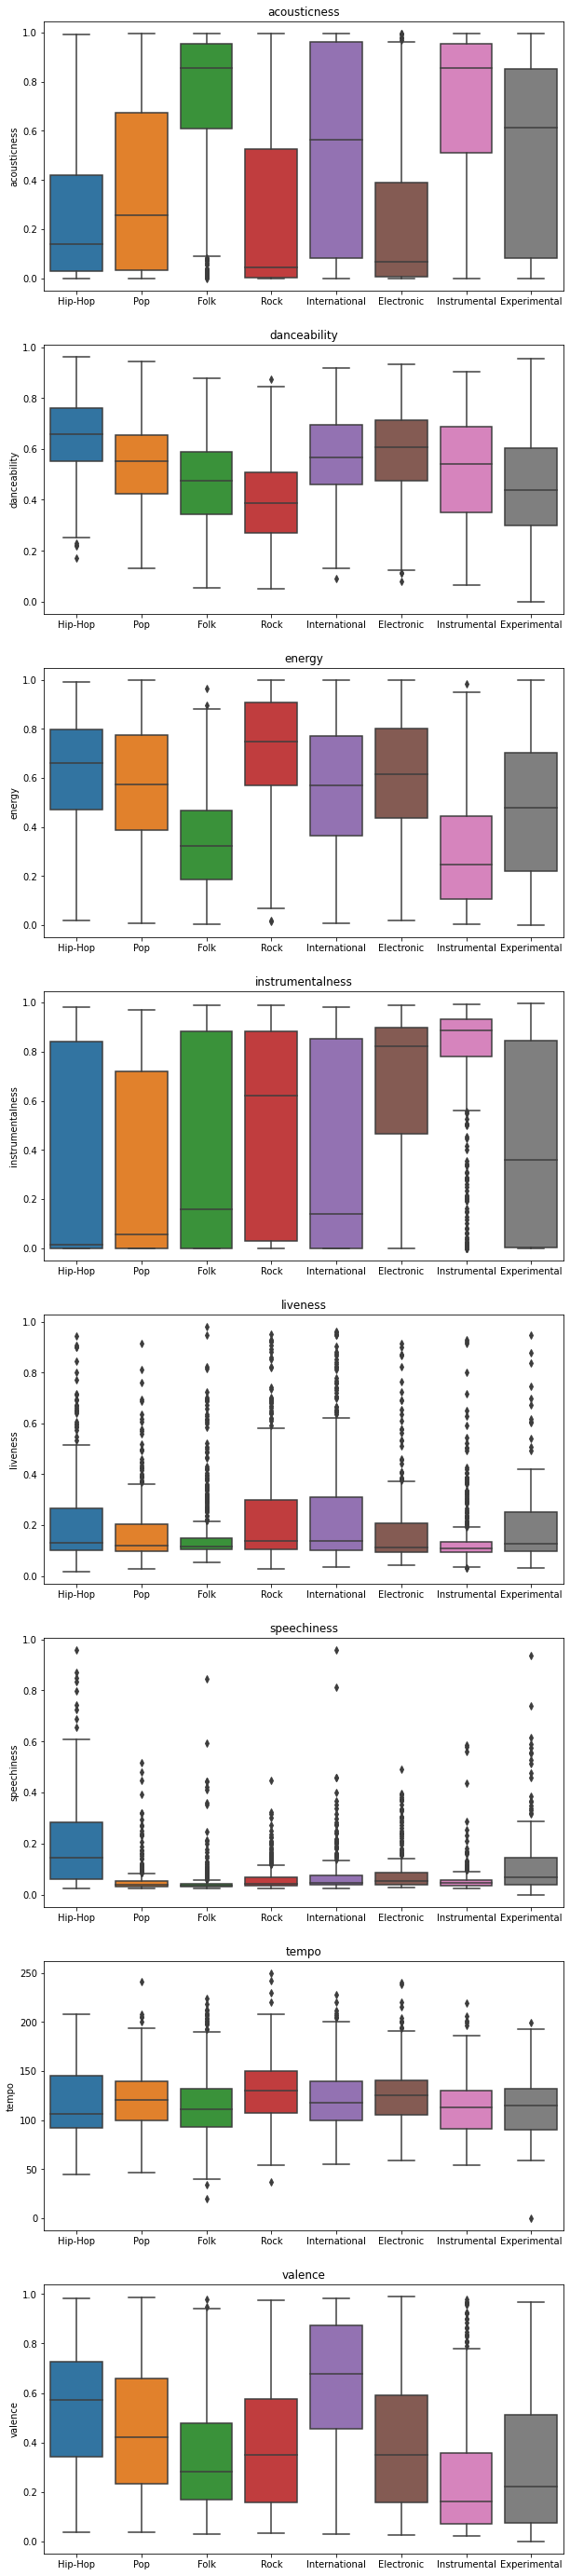

In [12]:
total = len(df.iloc[:, 4:].columns)
fig, axes = plt.subplots(total, 1, figsize=(10, 50))

for i, col in enumerate(df.iloc[:, 4:]):
    axes[i].set_title(col)
    sns.boxplot(ax=axes[i], x='genre', data=df, y=col)
    axes[i].set(xlabel=None)